<h1> Welcome to Customers Churned in Telecom Services Data Exploration! </h1> 

Customer churn is a critical issue in the telecom industry, leading to revenue loss and increased customer acquisition costs. Getting new customers to sign up to your services is one thing, but it’s not enough to keep your business afloat for long. To survive, your business needs loyal customers, and that means continuously looking at ways you can improve your service to keep your customers happy. Identifying key factors influencing churn can help telecom companies improve customer retention strategies.

How can we leverage customer data to accurately assess telecom churn with at least **70%** accuracy, identify **key churn drivers**, and provide actionable insights for retention strategies in the next **3 to 4 weeks**?

First and foremost let's import the necessary libraries to complete the analysis.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Now it's time to import the dataset, and use .info() to better understand the variables inside the dataset.

In [13]:
df_churn = pd.read_csv('customer_churn_telecom_services.csv')
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Data Cleansing  
This section will cover the data cleansing and data preparation activities to prepare the dataset for analysis.  
- Handling missing values
- Calculate total amount  of customers churned and churn percentage

In [233]:
# Creating the 'churn_numerical' column for more efficient analysis of churn data
df_churn['churn_numerical'] = df_churn['Churn'].map({'Yes': 1, 'No': 0})

In [15]:
# Calculate Total Churned Customers & Percentage
# Checking the target variable distribution
churn_counts = df_churn['Churn'].value_counts()
total_customers = len(df_churn)

# Display churn numbers
print("Total Customers: ", total_customers)
print("Total Churned Customers: ", churn_counts.iloc[1])
print(f"Churn Rate: {churn_counts.iloc[1] / total_customers:.2%}")

Total Customers:  7043
Total Churned Customers:  1869
Churn Rate: 26.54%


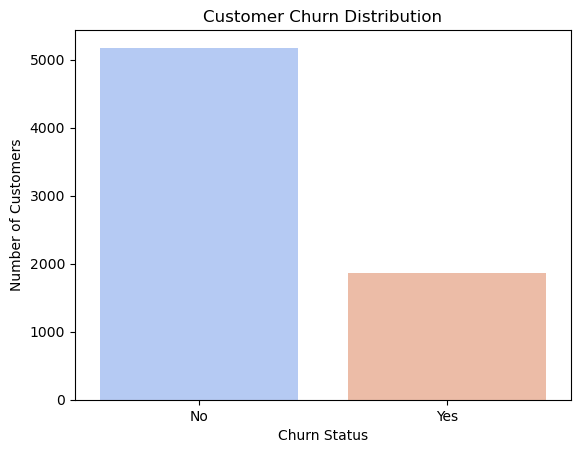

In [17]:
sns.barplot(x=churn_counts.index, y=churn_counts.values, hue=churn_counts.index, 
            palette='coolwarm', legend=False)  
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Distribution")
plt.show()

# Issue 1: Feature Importance for Churn Status
- Analyze feature correlations to classify churn vs. non-churn customers.
- Identify the most relevant features for churn prediction.

To understand which features are most important for this analysis, it is important to analyze their correlation with the decision to churn. The goal is to identiify the features which are least important that can be excluded from the remainder of the analysis.

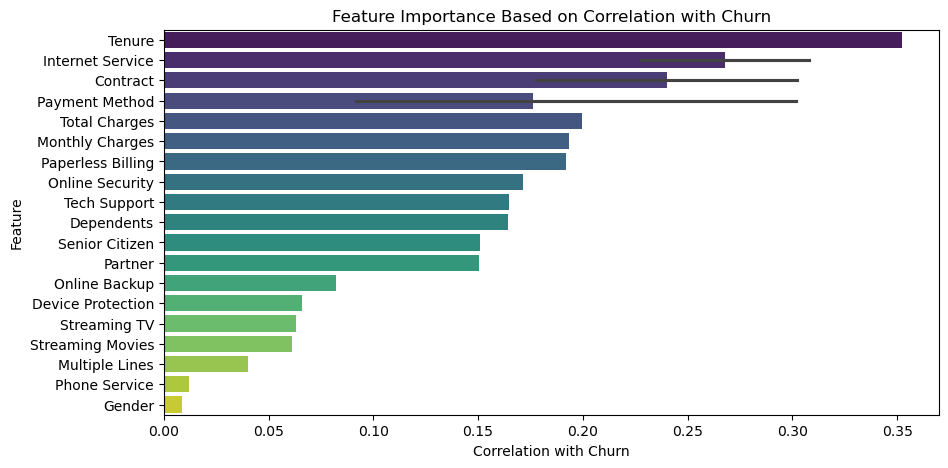

In [192]:
correlation = df_encoded.corr()

# Get the feature importance based on correlation with the 'Churn_Yes' column
feature_corr = correlation['Churn_Yes'].abs().sort_values(ascending=False)

# Map feature names to clean up syntax and simplify visualization
feature_mapping = {'gender_Male': 'Gender', 'SeniorCitizen': 'Senior Citizen',
    'Partner_Yes': 'Partner', 'Dependents_Yes': 'Dependents',
    'PhoneService_Yes': 'Phone Service', 'MultipleLines_Yes': 'Multiple Lines',
    'InternetService_Fiber optic': 'Internet Service', 'InternetService_No': 'Internet Service',
    'OnlineSecurity_Yes': 'Online Security', 'OnlineBackup_Yes': 'Online Backup',
    'DeviceProtection_Yes': 'Device Protection', 'TechSupport_Yes': 'Tech Support',
    'StreamingTV_Yes': 'Streaming TV', 'StreamingMovies_Yes': 'Streaming Movies',
    'Contract_One year': 'Contract', 'Contract_Two year': 'Contract',
    'PaperlessBilling_Yes': 'Paperless Billing', 'PaymentMethod_Credit card (automatic)': 'Payment Method', 
    'PaymentMethod_Electronic check': 'Payment Method',
    'PaymentMethod_Mailed check': 'Payment Method', 'tenure': 'Tenure',
    'MonthlyCharges': 'Monthly Charges', 'TotalCharges': 'Total Charges'}

# Rename features in the correlation output
feature_corr.index = feature_corr.index.map(feature_mapping)

#Visualize feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_corr.values, y=feature_corr.index, hue=feature_corr.index, palette="viridis", legend=False)
plt.xlabel("Correlation with Churn")
plt.ylabel("Feature")
plt.title("Feature Importance Based on Correlation with Churn")
plt.show()

The features which most directly correlate with customer churn are **Tenure, Internet Service, and Contract Type**, which intrinsically relates to monthly and total charges. These categories will be the focus areas of this data exploration. 

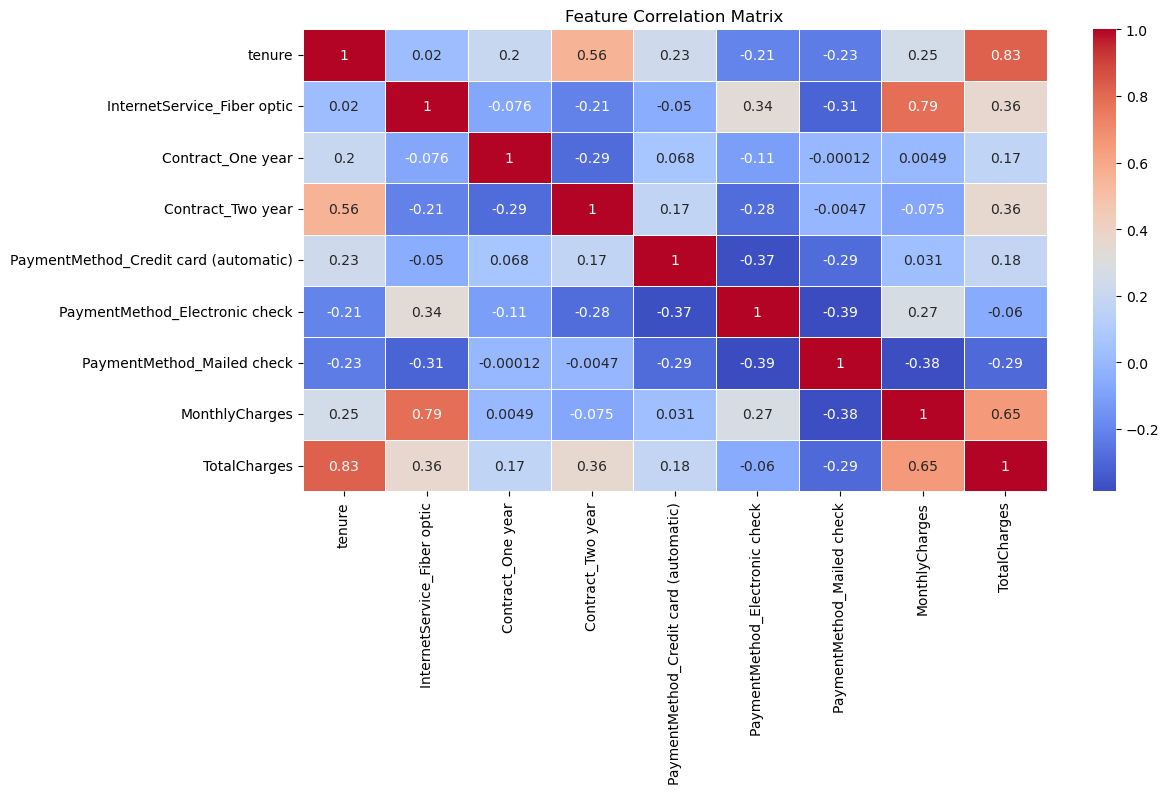

In [214]:
#Select specific columns based on previous feature correlation
selected_columns = ['tenure', 
                    'InternetService_Fiber optic', 
                    'Contract_One year', 'Contract_Two year', 
                    'PaymentMethod_Credit card (automatic)', 
                    'PaymentMethod_Electronic check', 
                    'PaymentMethod_Mailed check', 
                    'MonthlyCharges', 'TotalCharges']

# Subset the DataFrame to include only the selected columns
df_selected = df_encoded[selected_columns]

# Compute correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

Payment method appears to have a generally negative  correlation with other churn features. The key standouts here are the correlation between **tenure** and **total charges (0.83)**, as well as monthly charges with Fiber-optic internet service.

# Issue 2: Churn Driver Analysis  
- Analyze customer demographics and service types.
- Identify key drivers influencing customer churn.
- Explore behavioral patterns (monthly charges, tenure, contract type).

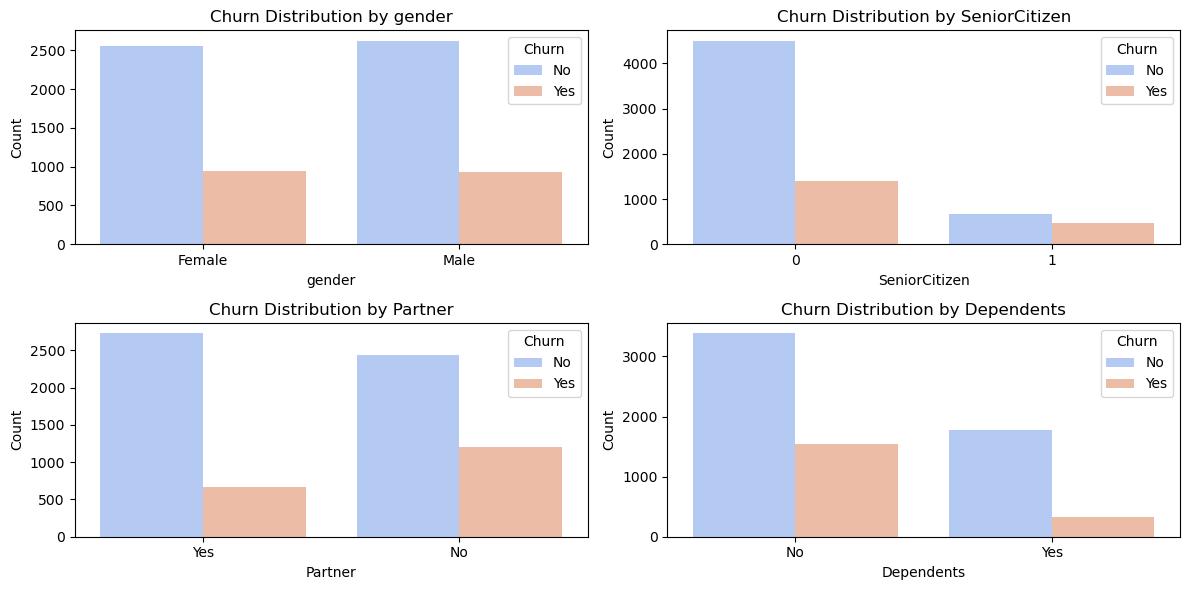

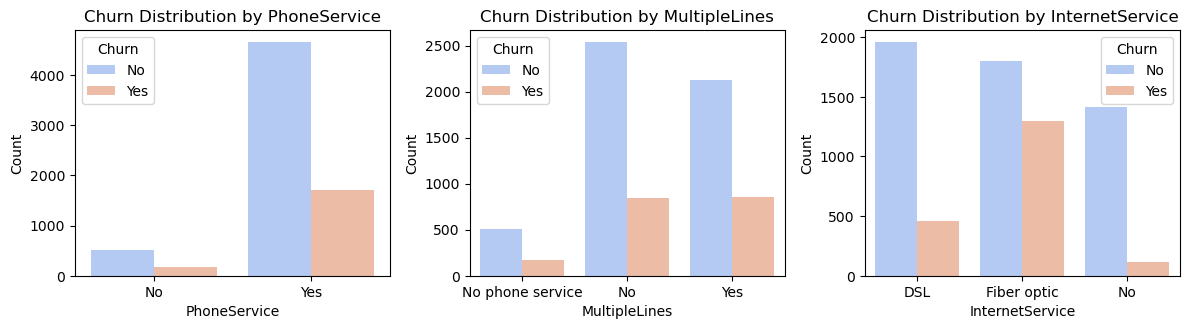

In [205]:
# Define demographic and service-related columns
demo_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
service_cols = ['PhoneService', 'MultipleLines', 'InternetService']

# Demographics visual
plt.figure(figsize=(12, 6))
for i, col in enumerate(demo_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_churn, x=col, hue='Churn', palette='coolwarm')
    plt.title(f"Churn Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Service types visual
plt.figure(figsize=(12, 6))
for i, col in enumerate(service_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df_churn, x=col, hue='Churn', palette='coolwarm')
    plt.title(f"Churn Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

The Internet service category reveals some interesting information. A disproportionate amount of churned customers purchased Fiber Optic internet service.

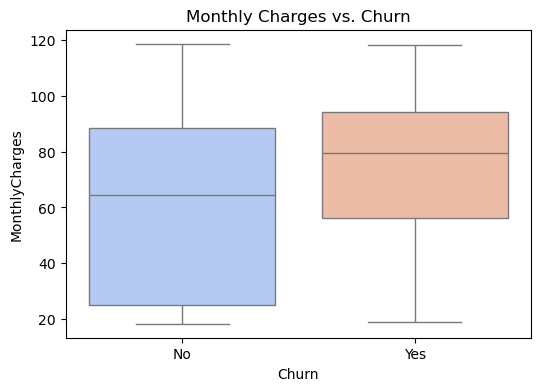

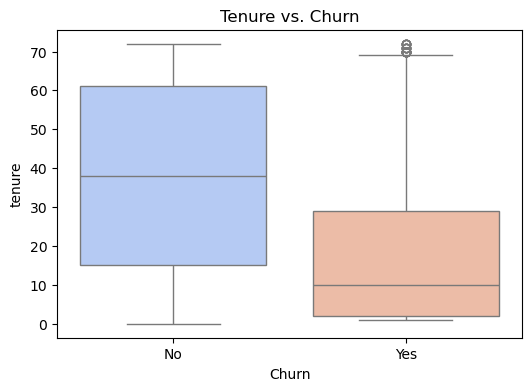

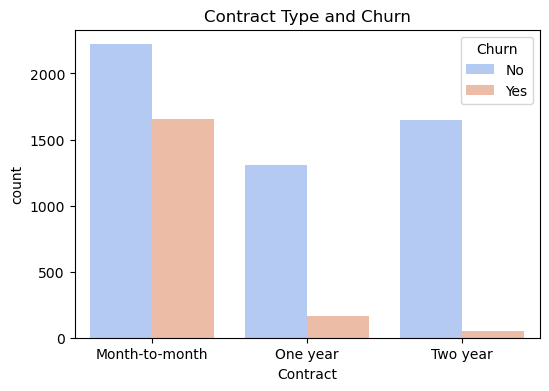

In [256]:
# Boxplot of Monthly Charges by Churn Status
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_churn, hue='Churn', palette='coolwarm', legend=False)
plt.title("Monthly Charges vs. Churn")
plt.show()

# Boxplot of Tenure by Churn Status
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df_churn, hue='Churn', palette='coolwarm', legend=False)
plt.title("Tenure vs. Churn")
plt.show()

# Churn Rate by Contract Type
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df_churn, palette='coolwarm')
plt.title("Contract Type and Churn")
plt.show()

- Monthly charges were generally higher for customers that churned, with  significantly less variance than the customers that did not. 
- Very few churned sutomers had maintained service for more than two years, with the median amountof tenure at less than one year.
- The vast majority of churned customers were paying to receive telecom services on a month-to-month basis.

Looking further into monthly charges, logistic regression to interpret the probability of customer churn based on this feature. 

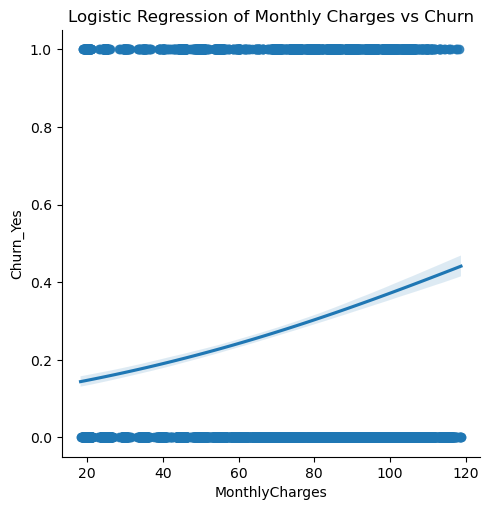

In [209]:
sns.lmplot(x='MonthlyCharges', y='Churn_Yes', data=df_encoded, logistic=True)
plt.title('Logistic Regression of Monthly Charges vs Churn')
plt.show()

As monthly charges increase, the probability of churn also increases. This relationship suggests that customers who pay higher monthly charges might be more dissatisfied or facing issues leading to churn. This could be due to factors like overpayment for services, or expecting higher quality service and becoming frustrated if it doesn't meet those expectations.

# Issue 3: Retention Strategy  
- Develop actionable recommendations for reducing churn.
- Create customer segments for targeted interventions.

An overwhelming amount of churned customers had very short tenure with their services, often less than 6 months. This in addition to higher monthly charges leads to these customers being signified as "high-risk" and should receive recommendations accordingly.

In [218]:
# Set default to 'Medium Risk'
df_churn['Churn_Segment'] = 'Medium Risk'

# - Very short tenure or high charges (>85)
df_churn.loc[((df_churn['tenure'] < 6) & (df_churn['MonthlyCharges'] > 60)) |  
       (df_churn['MonthlyCharges'] > 85), 'Churn_Segment'] = 'High Risk'

# - Longer tenure, lower charges (<65)
df_churn.loc[(df_churn['tenure'] >= 24) & 
       (df_churn['MonthlyCharges'] < 65), 'Churn_Segment'] = 'Low Risk'

print(df_churn['Churn_Segment'].value_counts())

Churn_Segment
Medium Risk    2889
High Risk      2651
Low Risk       1503
Name: count, dtype: int64


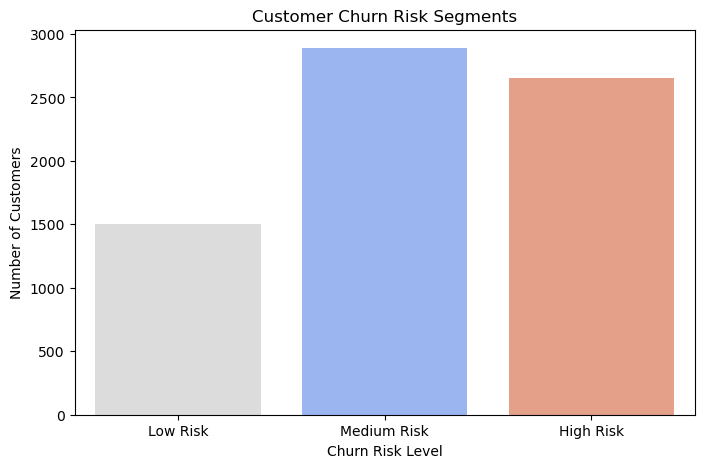

In [346]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_churn, x='Churn_Segment', hue='Churn_Segment', palette='coolwarm', 
              order=['Low Risk', 'Medium Risk', 'High Risk'], legend=False)
plt.title("Customer Churn Risk Segments")
plt.xlabel("Churn Risk Level")
plt.ylabel("Number of Customers")
plt.show()

# **INSIGHTS**


# Key Churn Drivers
**Top Features Influencing Churn**:

- Tenure: Shorter tenure significantly correlates with higher churn rates.

- Monthly Charges: Higher monthly charges are a strong predictor of churn.

- Contract Type: Month-to-month contracts show the highest churn compared to long-term contracts.

**Demographic Insights**:

- Dependents: Customers without dependents are more likely to churn.

- Partner Status: Customers without partners show a slightly higher churn rate.

**Behavioral Patterns**:

- Internet Service: Customers with fiber optic internet are more likely to churn compared to others.

- Multiple Lines: Single-line users churn more frequently than those with multiple lines.

# Retention Summary & Recommendations
**High-risk customers** (short tenure, high monthly charges exceeding $85) are likely to churn.
   - Recommendation: Introduce loyalty discounts or early renewal perks.

**Contract type matters** – month-to-month customers churn more.
   - Recommendation: Offer incentives for annual or long-term contracts.

**Service satisfaction influences churn** – customers with Fiber Optic are more likely to churn than DSL users.
   - Recommendation: Improve service reliability or provide better customer support.

**Senior customers churn less than younger users.**
   - Recommendation: Market retention programs based on customer age groups.